In [8]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
import mlflow
import mlflow.tensorflow

Text(0.5, 1.0, '7')

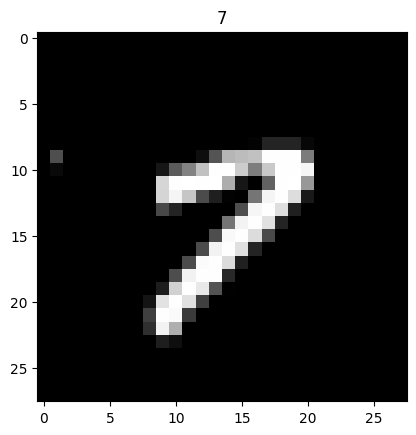

In [9]:
(X_treinamento, y_treinamento),(X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[29],cmap='gray')
plt.title(y_treinamento[29])

In [10]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [11]:
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')
X_treinamento /= 255
X_teste /= 255

In [13]:
y_treinamento = np_utils.to_categorical(y_treinamento,10)
y_teste = np_utils.to_categorical(y_teste,10)

In [14]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [15]:
def treina_dl(n_camadas_ocultas,n_units,activation,drop_out, epochs):
    mlflow.set_experiment("DLExperimento")
    
    with mlflow.start_run():
        mlflow.tensorflow.autolog()
        
        #registro de tags
        mlflow.set_tag("n_camadas_ocultas",n_camadas_ocultas)
        mlflow.set_tag("n_units",n_units)
        mlflow.set_tag("activation",activation)
        mlflow.set_tag("drop_out",drop_out)
        mlflow.set_tag("epochs",epochs)

    
        modelo = Sequential()
        
        #cria camada oculta mais camada de entrada
        modelo.add(Dense(units=n_units, activation=activation, input_dim=784))
        modelo.add(Dropout(drop_out))
        
        #camadas ocultas adicionais, com drop out
        for n in range(n_camadas_ocultas):
            modelo.add(Dense(units=n_units, activation=activation))
            modelo.add(Dropout(drop_out))            
        
        #camada de saída
        modelo.add(Dense(units=10,activation='softmax'))
        
        modelo.compile(optimizer='adam', loss="categorical_crossentropy",metrics=['accuracy'])
        
        modelo.summary()
        
        historico = modelo.fit(X_treinamento, y_treinamento, epochs =epochs, 
                              validation_data=(X_teste,y_teste))
        
        #grafico para erros e acuracia
        historico.history.keys()
        loss = plt.plot(historico.history['val_loss'])
        plt.savefig("loss.png")
        acuracia = plt.plot(historico.history['val_accuracy'])
        plt.savefig("acuracia.png")
        
        #registrar artefatos
        mlflow.log_artifact("loss.png")
        mlflow.log_artifact("acuracia.png")
       
        #informações de execução
        print("Modelo: ", mlflow.active_run().info.run_uuid)  
    mlflow.end_run()           
        

In [ ]:
n_camadas_ocultas = [1,2,3]
n_units = [16,32,64]
activation = ['relu','tanh']
drop_out = [0.1, 0.2]
epochs = [5,10,20]

for camadas in n_camadas_ocultas:
    for unidades in n_units:
        for ativacao in activation:
            for drop in drop_out:
                for epocas in epochs:
                    treina_dl(camadas,unidades,ativacao, drop, epocas)

2025/02/06 23:35:30 INFO mlflow.tracking.fluent: Experiment with name 'DLExperimento' does not exist. Creating a new experiment.
2025/02/06 23:35:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================]

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp6vwe0rdd\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp6vwe0rdd\model\data\model\assets
2025/02/06 23:36:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  02625eab12094794bfd7fb301f3d20cf
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

1875/1875 [==============================] - 14s 6ms/step - loss: 0.7138 - accuracy: 0.7727 - val_loss: 0.3189 - val_accuracy: 0.9079
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4205 - accuracy: 0.8706 - val_loss: 0.2549 - val_accuracy: 0.9249
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3680 - accuracy: 0.8874 - val_loss: 0.2369 - val_accuracy: 0.9279
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3419 - accuracy: 0.8964 - val_loss: 0.2222 - val_accuracy: 0.9350
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3235 - accuracy: 0.9020 - val_loss: 0.2106 - val_accuracy: 0.9386
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3073 - accuracy: 0.9058 - val_loss: 0.2030 - val_accuracy: 0.9398
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2968 - accuracy: 0.9100 - val_loss: 0.1989 - val_accuracy: 0.9437
E

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp28njci2w\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp28njci2w\model\data\model\assets


Modelo:  ff99b342eacc41f9b093b48eb2d98148


2025/02/06 23:38:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
   1/1875 [............................

1875/1875 [==============================] - 21s 10ms/step - loss: 0.6793 - accuracy: 0.7836 - val_loss: 0.2725 - val_accuracy: 0.9193
Epoch 2/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4128 - accuracy: 0.8733 - val_loss: 0.2337 - val_accuracy: 0.9311
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3665 - accuracy: 0.8871 - val_loss: 0.2131 - val_accuracy: 0.9365
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3365 - accuracy: 0.8965 - val_loss: 0.2053 - val_accuracy: 0.9394
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3214 - accuracy: 0.9013 - val_loss: 0.2028 - val_accuracy: 0.9403
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3075 - accuracy: 0.9047 - val_loss: 0.1872 - val_accuracy: 0.9442
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3001 - accuracy: 0.9093 - val_loss: 0.1902 - val_accuracy: 0.94

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp2mxuqp9v\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp2mxuqp9v\model\data\model\assets


Modelo:  c1bd85a57fcd4de280b0fea87353760a


2025/02/06 23:42:32 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                12560     
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   1/1875 [.............................

1875/1875 [==============================] - 11s 5ms/step - loss: 0.8559 - accuracy: 0.7181 - val_loss: 0.3445 - val_accuracy: 0.9057
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5866 - accuracy: 0.8113 - val_loss: 0.2841 - val_accuracy: 0.9177
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5368 - accuracy: 0.8263 - val_loss: 0.2652 - val_accuracy: 0.9237
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5056 - accuracy: 0.8383 - val_loss: 0.2494 - val_accuracy: 0.9302
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4842 - accuracy: 0.8451 - val_loss: 0.2378 - val_accuracy: 0.9307


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp83iz41ew\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp83iz41ew\model\data\model\assets


Modelo:  b5d0392cb7c349cfa77d160254ccaddf


2025/02/06 23:43:35 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                12560     
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
   1/1875 [............................

1875/1875 [==============================] - 13s 6ms/step - loss: 0.8524 - accuracy: 0.7168 - val_loss: 0.3380 - val_accuracy: 0.9020
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5672 - accuracy: 0.8248 - val_loss: 0.2747 - val_accuracy: 0.9203
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5158 - accuracy: 0.8397 - val_loss: 0.2607 - val_accuracy: 0.9263
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4943 - accuracy: 0.8482 - val_loss: 0.2586 - val_accuracy: 0.9282
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4749 - accuracy: 0.8548 - val_loss: 0.2510 - val_accuracy: 0.9280
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4601 - accuracy: 0.8584 - val_loss: 0.2409 - val_accuracy: 0.9298
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4535 - accuracy: 0.8601 - val_loss: 0.2455 - val_accuracy: 0.9263


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp20i6ypj1\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp20i6ypj1\model\data\model\assets


Modelo:  71497d65f0ab43b2b62690a21173a454


2025/02/06 23:46:10 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                12560     
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
   1/1875 [............................

1875/1875 [==============================] - 6s 3ms/step - loss: 0.9110 - accuracy: 0.6933 - val_loss: 0.3632 - val_accuracy: 0.9009
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6120 - accuracy: 0.8043 - val_loss: 0.2969 - val_accuracy: 0.9165
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5546 - accuracy: 0.8255 - val_loss: 0.2772 - val_accuracy: 0.9201
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5252 - accuracy: 0.8368 - val_loss: 0.2637 - val_accuracy: 0.9262
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4997 - accuracy: 0.8436 - val_loss: 0.2583 - val_accuracy: 0.9249
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4859 - accuracy: 0.8494 - val_loss: 0.2572 - val_accuracy: 0.9247
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4747 - accuracy: 0.8525 - val_loss: 0.2512 - val_accuracy: 0.9302
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpemase45d\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpemase45d\model\data\model\assets


Modelo:  1211b47bd51c45e1ad4581f11de2438b


2025/02/06 23:50:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                12560     
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   1/1875 [.............................

1875/1875 [==============================] - 11s 5ms/step - loss: 0.5710 - accuracy: 0.8461 - val_loss: 0.2889 - val_accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3335 - accuracy: 0.9038 - val_loss: 0.2529 - val_accuracy: 0.9255
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2993 - accuracy: 0.9129 - val_loss: 0.2218 - val_accuracy: 0.9339
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.9181 - val_loss: 0.2107 - val_accuracy: 0.9374
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9226 - val_loss: 0.2044 - val_accuracy: 0.9387


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpgk5kbo02\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpgk5kbo02\model\data\model\assets
2025/02/06 23:51:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  fcb6a5254b6648f78e26a330a40e5491
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                12560     
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5534 - accuracy: 0.8515 - val_loss: 0.2744 - val_accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3273 - accuracy: 0.9048 - val_loss: 0.2353 - val_accuracy: 0.9304
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2922 - accuracy: 0.9141 - val_loss: 0.2215 - val_accuracy: 0.9352
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2716 - accuracy: 0.9203 - val_loss: 0.2063 - val_accuracy: 0.9379
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2590 - accuracy: 0.9237 - val_loss: 0.1997 - val_accuracy: 0.9401
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2513 - accuracy: 0.9250 - val_loss: 0.1928 - val_accuracy: 0.9412
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2414 - accuracy: 0.9286 - val_loss: 0.1913 - val_accuracy: 0.9443
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpyji1s2d8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpyji1s2d8\model\data\model\assets


Modelo:  ea9b294ad37f405f8828b5f29b6e8c6a


2025/02/06 23:51:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                12560     
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
   1/1875 [............................

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5644 - accuracy: 0.8485 - val_loss: 0.2775 - val_accuracy: 0.9187
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3299 - accuracy: 0.9064 - val_loss: 0.2429 - val_accuracy: 0.9280
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.9159 - val_loss: 0.2303 - val_accuracy: 0.9341
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2765 - accuracy: 0.9205 - val_loss: 0.2244 - val_accuracy: 0.9326
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9228 - val_loss: 0.2079 - val_accuracy: 0.9384
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9255 - val_loss: 0.2088 - val_accuracy: 0.9401
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2456 - accuracy: 0.9280 - val_loss: 0.1980 - val_accuracy: 0.9410
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpa0jqwdz3\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpa0jqwdz3\model\data\model\assets


Modelo:  3350ca60e5d44ecfa5de0fd899e7f602


2025/02/06 23:53:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                12560     
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   1/1875 [.............................

1875/1875 [==============================] - 5s 2ms/step - loss: 0.6777 - accuracy: 0.8106 - val_loss: 0.3122 - val_accuracy: 0.9114
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4301 - accuracy: 0.8755 - val_loss: 0.2696 - val_accuracy: 0.9208
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.8850 - val_loss: 0.2572 - val_accuracy: 0.9262
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8919 - val_loss: 0.2533 - val_accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3609 - accuracy: 0.8951 - val_loss: 0.2473 - val_accuracy: 0.9291


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpaq8nlkf1\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpaq8nlkf1\model\data\model\assets
2025/02/06 23:53:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  981898995a8d412a8c69b3f96b9db75c
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                12560     
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dropout_21 (Dropout)        (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 2ms/step - loss: 0.6435 - accuracy: 0.8188 - val_loss: 0.3131 - val_accuracy: 0.9087
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4205 - accuracy: 0.8784 - val_loss: 0.2658 - val_accuracy: 0.9218
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3855 - accuracy: 0.8890 - val_loss: 0.2445 - val_accuracy: 0.9301
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8949 - val_loss: 0.2345 - val_accuracy: 0.9307
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3508 - accuracy: 0.8969 - val_loss: 0.2278 - val_accuracy: 0.9333
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.9000 - val_loss: 0.2229 - val_accuracy: 0.9338
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3309 - accuracy: 0.9033 - val_loss: 0.2274 - val_accuracy: 0.9339
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpf4_s8qpy\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpf4_s8qpy\model\data\model\assets
2025/02/06 23:54:49 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  eb2f8d470f5941468f82b3bd40ea6de5
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 16)                12560     
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dropout_23 (Dropout)        (None, 16)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 5s 2ms/step - loss: 0.6760 - accuracy: 0.8130 - val_loss: 0.3083 - val_accuracy: 0.9110
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4308 - accuracy: 0.8744 - val_loss: 0.2688 - val_accuracy: 0.9192
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3952 - accuracy: 0.8841 - val_loss: 0.2475 - val_accuracy: 0.9266
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3765 - accuracy: 0.8904 - val_loss: 0.2511 - val_accuracy: 0.9256
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3657 - accuracy: 0.8928 - val_loss: 0.2344 - val_accuracy: 0.9317
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8955 - val_loss: 0.2412 - val_accuracy: 0.9285
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3497 - accuracy: 0.8995 - val_loss: 0.2276 - val_accuracy: 0.9320
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmppo_sieeg\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmppo_sieeg\model\data\model\assets
2025/02/06 23:56:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  bbadc57490ad418dab3883cd6968f96d
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                25120     
                                                                 
 dropout_24 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 2ms/step - loss: 0.4690 - accuracy: 0.8562 - val_loss: 0.1911 - val_accuracy: 0.9430
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2503 - accuracy: 0.9244 - val_loss: 0.1460 - val_accuracy: 0.9558
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2109 - accuracy: 0.9353 - val_loss: 0.1360 - val_accuracy: 0.9575
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1881 - accuracy: 0.9426 - val_loss: 0.1262 - val_accuracy: 0.9609
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1737 - accuracy: 0.9462 - val_loss: 0.1183 - val_accuracy: 0.9630


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpjydqudmt\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpjydqudmt\model\data\model\assets
2025/02/06 23:56:50 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  803a6ebdf25c410a86a560c51f9791f0
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                25120     
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_41 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4779 - accuracy: 0.8554 - val_loss: 0.2032 - val_accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2608 - accuracy: 0.9224 - val_loss: 0.1638 - val_accuracy: 0.9507
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2173 - accuracy: 0.9349 - val_loss: 0.1516 - val_accuracy: 0.9539
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1929 - accuracy: 0.9415 - val_loss: 0.1387 - val_accuracy: 0.9570
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1768 - accuracy: 0.9466 - val_loss: 0.1281 - val_accuracy: 0.9590
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1656 - accuracy: 0.9492 - val_loss: 0.1330 - val_accuracy: 0.9608
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1568 - accuracy: 0.9521 - val_loss: 0.1271 - val_accuracy: 0.9633
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpb4ryfem8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpb4ryfem8\model\data\model\assets
2025/02/06 23:57:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  0499192ca4094153acf4b52bad6b60ed
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                25120     
                                                                 
 dropout_28 (Dropout)        (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 32)                1056      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_44 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4582 - accuracy: 0.8617 - val_loss: 0.2069 - val_accuracy: 0.9364
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2543 - accuracy: 0.9235 - val_loss: 0.1545 - val_accuracy: 0.9533
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2110 - accuracy: 0.9361 - val_loss: 0.1403 - val_accuracy: 0.9589
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1896 - accuracy: 0.9424 - val_loss: 0.1349 - val_accuracy: 0.9593
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1761 - accuracy: 0.9460 - val_loss: 0.1219 - val_accuracy: 0.9628
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1634 - accuracy: 0.9490 - val_loss: 0.1244 - val_accuracy: 0.9631
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1552 - accuracy: 0.9513 - val_loss: 0.1191 - val_accuracy: 0.9651
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpy625iane\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpy625iane\model\data\model\assets
2025/02/06 23:59:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  834acc0bfa8a4caebaf4889734ab4253
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                25120     
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 32)                1056      
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_47 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5787 - accuracy: 0.8211 - val_loss: 0.2270 - val_accuracy: 0.9314
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.8991 - val_loss: 0.1797 - val_accuracy: 0.9471
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2905 - accuracy: 0.9142 - val_loss: 0.1702 - val_accuracy: 0.9484
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2594 - accuracy: 0.9237 - val_loss: 0.1509 - val_accuracy: 0.9548
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2424 - accuracy: 0.9269 - val_loss: 0.1388 - val_accuracy: 0.9594


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpb9h92vna\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpb9h92vna\model\data\model\assets
2025/02/06 23:59:37 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  f335547056884090bad1a4715f62654e
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                25120     
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 32)                1056      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_50 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5866 - accuracy: 0.8169 - val_loss: 0.2317 - val_accuracy: 0.9310
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3469 - accuracy: 0.8977 - val_loss: 0.1824 - val_accuracy: 0.9449
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.9139 - val_loss: 0.1638 - val_accuracy: 0.9505
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2637 - accuracy: 0.9212 - val_loss: 0.1545 - val_accuracy: 0.9539
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2471 - accuracy: 0.9255 - val_loss: 0.1467 - val_accuracy: 0.9563
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2320 - accuracy: 0.9300 - val_loss: 0.1381 - val_accuracy: 0.9582
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2226 - accuracy: 0.9327 - val_loss: 0.1311 - val_accuracy: 0.9617
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpsk58vjd5\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpsk58vjd5\model\data\model\assets
2025/02/07 00:00:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  57c7203165e64223aa70c560cea3d7b1
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                25120     
                                                                 
 dropout_34 (Dropout)        (None, 32)                0         
                                                                 
 dense_52 (Dense)            (None, 32)                1056      
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                                                 
 dense_53 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5752 - accuracy: 0.8210 - val_loss: 0.2179 - val_accuracy: 0.9361
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.9009 - val_loss: 0.1770 - val_accuracy: 0.9485
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2863 - accuracy: 0.9151 - val_loss: 0.1632 - val_accuracy: 0.9512
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2589 - accuracy: 0.9219 - val_loss: 0.1497 - val_accuracy: 0.9555
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2454 - accuracy: 0.9259 - val_loss: 0.1472 - val_accuracy: 0.9564
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2312 - accuracy: 0.9315 - val_loss: 0.1427 - val_accuracy: 0.9582
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2215 - accuracy: 0.9338 - val_loss: 0.1412 - val_accuracy: 0.9604
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpm1cea6sk\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpm1cea6sk\model\data\model\assets
2025/02/07 08:45:43 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\kauak\AppData\Local\Temp\tmpm1cea6sk\model, flavor: keras), fall back to return ['tensorflow==2.11.0', 'keras==2.11.0']. Set logging level to DEBUG to see the full traceback.


Modelo:  556fa8a8d3234df3948ab94acfba02d7


2025/02/07 08:46:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 32)                25120     
                                                                 
 dropout_36 (Dropout)        (None, 32)                0         
                                                                 
 dense_55 (Dense)            (None, 32)                1056      
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
   1/1875 [............................

1875/1875 [==============================] - 8s 3ms/step - loss: 0.3987 - accuracy: 0.8898 - val_loss: 0.2227 - val_accuracy: 0.9343
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2319 - accuracy: 0.9306 - val_loss: 0.1671 - val_accuracy: 0.9490
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1921 - accuracy: 0.9423 - val_loss: 0.1467 - val_accuracy: 0.9546
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1741 - accuracy: 0.9474 - val_loss: 0.1361 - val_accuracy: 0.9582
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1603 - accuracy: 0.9517 - val_loss: 0.1299 - val_accuracy: 0.9607


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpb7yk_ztg\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpb7yk_ztg\model\data\model\assets
2025/02/07 08:47:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  1c41fa49be8844cd82b3d33a4089d30b
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 32)                25120     
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_58 (Dense)            (None, 32)                1056      
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4042 - accuracy: 0.8859 - val_loss: 0.2192 - val_accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2363 - accuracy: 0.9308 - val_loss: 0.1742 - val_accuracy: 0.9487
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1995 - accuracy: 0.9402 - val_loss: 0.1618 - val_accuracy: 0.9538
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1791 - accuracy: 0.9453 - val_loss: 0.1455 - val_accuracy: 0.9576
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1661 - accuracy: 0.9494 - val_loss: 0.1340 - val_accuracy: 0.9606
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1557 - accuracy: 0.9528 - val_loss: 0.1315 - val_accuracy: 0.9606
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1471 - accuracy: 0.9546 - val_loss: 0.1239 - val_accuracy: 0.9628
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmptd68fy4l\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmptd68fy4l\model\data\model\assets
2025/02/07 08:48:30 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  ff24b8f644bc43fea0cd7b5f4a133822
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                25120     
                                                                 
 dropout_40 (Dropout)        (None, 32)                0         
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dropout_41 (Dropout)        (None, 32)                0         
                                                                 
 dense_62 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4082 - accuracy: 0.8864 - val_loss: 0.2371 - val_accuracy: 0.9306
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2265 - accuracy: 0.9332 - val_loss: 0.1689 - val_accuracy: 0.9508
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1920 - accuracy: 0.9425 - val_loss: 0.1477 - val_accuracy: 0.9550
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1707 - accuracy: 0.9487 - val_loss: 0.1326 - val_accuracy: 0.9611
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1584 - accuracy: 0.9519 - val_loss: 0.1286 - val_accuracy: 0.9606
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1488 - accuracy: 0.9533 - val_loss: 0.1242 - val_accuracy: 0.9631
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1406 - accuracy: 0.9567 - val_loss: 0.1216 - val_accuracy: 0.9635
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmppzh1z5ce\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmppzh1z5ce\model\data\model\assets
2025/02/07 08:50:15 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  22f79527cddf4c08932a1165970c3359
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                25120     
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_64 (Dense)            (None, 32)                1056      
                                                                 
 dropout_43 (Dropout)        (None, 32)                0         
                                                                 
 dense_65 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4785 - accuracy: 0.8646 - val_loss: 0.2473 - val_accuracy: 0.9275
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3011 - accuracy: 0.9110 - val_loss: 0.2133 - val_accuracy: 0.9370
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9212 - val_loss: 0.1863 - val_accuracy: 0.9442
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2439 - accuracy: 0.9270 - val_loss: 0.1672 - val_accuracy: 0.9498
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2297 - accuracy: 0.9310 - val_loss: 0.1624 - val_accuracy: 0.9521


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp14d8_c0d\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp14d8_c0d\model\data\model\assets
2025/02/07 08:50:53 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  94dce94ab50d47cb9f806a810dc436e5
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 32)                25120     
                                                                 
 dropout_44 (Dropout)        (None, 32)                0         
                                                                 
 dense_67 (Dense)            (None, 32)                1056      
                                                                 
 dropout_45 (Dropout)        (None, 32)                0         
                                                                 
 dense_68 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4642 - accuracy: 0.8688 - val_loss: 0.2457 - val_accuracy: 0.9282
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3020 - accuracy: 0.9104 - val_loss: 0.2000 - val_accuracy: 0.9415
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9210 - val_loss: 0.1818 - val_accuracy: 0.9451
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2421 - accuracy: 0.9294 - val_loss: 0.1752 - val_accuracy: 0.9471
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2288 - accuracy: 0.9328 - val_loss: 0.1546 - val_accuracy: 0.9537
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2166 - accuracy: 0.9362 - val_loss: 0.1574 - val_accuracy: 0.9514
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2095 - accuracy: 0.9368 - val_loss: 0.1467 - val_accuracy: 0.9557
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpa7521ody\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpa7521ody\model\data\model\assets
2025/02/07 08:52:35 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  b181fec0463241e882050b86e0a94390
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 32)                25120     
                                                                 
 dropout_46 (Dropout)        (None, 32)                0         
                                                                 
 dense_70 (Dense)            (None, 32)                1056      
                                                                 
 dropout_47 (Dropout)        (None, 32)                0         
                                                                 
 dense_71 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4745 - accuracy: 0.8657 - val_loss: 0.2463 - val_accuracy: 0.9283
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3003 - accuracy: 0.9125 - val_loss: 0.2108 - val_accuracy: 0.9384
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2647 - accuracy: 0.9222 - val_loss: 0.1880 - val_accuracy: 0.9454
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2427 - accuracy: 0.9286 - val_loss: 0.1676 - val_accuracy: 0.9506
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2283 - accuracy: 0.9329 - val_loss: 0.1596 - val_accuracy: 0.9530
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2174 - accuracy: 0.9358 - val_loss: 0.1487 - val_accuracy: 0.9565
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2081 - accuracy: 0.9383 - val_loss: 0.1486 - val_accuracy: 0.9566
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpk23p6e61\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpk23p6e61\model\data\model\assets
2025/02/07 08:55:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  98ae903cd9ce43ed9677c8e328bd1475
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                50240     
                                                                 
 dropout_48 (Dropout)        (None, 64)                0         
                                                                 
 dense_73 (Dense)            (None, 64)                4160      
                                                                 
 dropout_49 (Dropout)        (None, 64)                0         
                                                                 
 dense_74 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3329 - accuracy: 0.8999 - val_loss: 0.1466 - val_accuracy: 0.9555
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1616 - accuracy: 0.9514 - val_loss: 0.1135 - val_accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1298 - accuracy: 0.9602 - val_loss: 0.0936 - val_accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9656 - val_loss: 0.0898 - val_accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0955 - accuracy: 0.9704 - val_loss: 0.0883 - val_accuracy: 0.9730


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmprasq897e\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmprasq897e\model\data\model\assets
2025/02/07 08:56:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  2a5cf75264a1420888b685c12f8cc846
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 64)                50240     
                                                                 
 dropout_50 (Dropout)        (None, 64)                0         
                                                                 
 dense_76 (Dense)            (None, 64)                4160      
                                                                 
 dropout_51 (Dropout)        (None, 64)                0         
                                                                 
 dense_77 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3460 - accuracy: 0.8977 - val_loss: 0.1676 - val_accuracy: 0.9511
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1679 - accuracy: 0.9498 - val_loss: 0.1240 - val_accuracy: 0.9616
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1318 - accuracy: 0.9594 - val_loss: 0.0980 - val_accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1117 - accuracy: 0.9654 - val_loss: 0.0919 - val_accuracy: 0.9718
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0949 - accuracy: 0.9702 - val_loss: 0.0885 - val_accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9726 - val_loss: 0.0861 - val_accuracy: 0.9743
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0774 - accuracy: 0.9752 - val_loss: 0.0987 - val_accuracy: 0.9706
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp3grqwe6i\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp3grqwe6i\model\data\model\assets
2025/02/07 08:57:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  56c0805791cc47358ef7d49c5fe821da
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 64)                50240     
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_79 (Dense)            (None, 64)                4160      
                                                                 
 dropout_53 (Dropout)        (None, 64)                0         
                                                                 
 dense_80 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3320 - accuracy: 0.9007 - val_loss: 0.1482 - val_accuracy: 0.9546
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1619 - accuracy: 0.9506 - val_loss: 0.1049 - val_accuracy: 0.9681
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1267 - accuracy: 0.9619 - val_loss: 0.1034 - val_accuracy: 0.9677
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1081 - accuracy: 0.9665 - val_loss: 0.0844 - val_accuracy: 0.9740
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0920 - accuracy: 0.9709 - val_loss: 0.0772 - val_accuracy: 0.9743
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0847 - accuracy: 0.9729 - val_loss: 0.0803 - val_accuracy: 0.9754
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0773 - accuracy: 0.9752 - val_loss: 0.0827 - val_accuracy: 0.9762
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpvnk8fj_v\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpvnk8fj_v\model\data\model\assets
2025/02/07 09:00:13 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  386165437ece4b5d8fa4c8ced0d27e0c
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 64)                50240     
                                                                 
 dropout_54 (Dropout)        (None, 64)                0         
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 dropout_55 (Dropout)        (None, 64)                0         
                                                                 
 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 2ms/step - loss: 0.3972 - accuracy: 0.8790 - val_loss: 0.1629 - val_accuracy: 0.9466
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2048 - accuracy: 0.9383 - val_loss: 0.1211 - val_accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1673 - accuracy: 0.9500 - val_loss: 0.1100 - val_accuracy: 0.9661
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1466 - accuracy: 0.9550 - val_loss: 0.0995 - val_accuracy: 0.9692
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1317 - accuracy: 0.9597 - val_loss: 0.0976 - val_accuracy: 0.9704


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpmbo6gc6o\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpmbo6gc6o\model\data\model\assets
2025/02/07 09:00:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  8eeedb8aac634d45afff445197ebbca6
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                50240     
                                                                 
 dropout_56 (Dropout)        (None, 64)                0         
                                                                 
 dense_85 (Dense)            (None, 64)                4160      
                                                                 
 dropout_57 (Dropout)        (None, 64)                0         
                                                                 
 dense_86 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 5s 2ms/step - loss: 0.3888 - accuracy: 0.8832 - val_loss: 0.1541 - val_accuracy: 0.9525
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2064 - accuracy: 0.9386 - val_loss: 0.1255 - val_accuracy: 0.9606
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1684 - accuracy: 0.9492 - val_loss: 0.1151 - val_accuracy: 0.9637
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1480 - accuracy: 0.9553 - val_loss: 0.1025 - val_accuracy: 0.9673
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1348 - accuracy: 0.9593 - val_loss: 0.1012 - val_accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9606 - val_loss: 0.0951 - val_accuracy: 0.9714
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1157 - accuracy: 0.9646 - val_loss: 0.0897 - val_accuracy: 0.9740
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp4gv5dlp4\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp4gv5dlp4\model\data\model\assets
2025/02/07 09:01:36 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  5a696b1c6b994b87af69b9303252b7fb
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 64)                50240     
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 dense_88 (Dense)            (None, 64)                4160      
                                                                 
 dropout_59 (Dropout)        (None, 64)                0         
                                                                 
 dense_89 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4080 - accuracy: 0.8757 - val_loss: 0.1621 - val_accuracy: 0.9512
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2130 - accuracy: 0.9362 - val_loss: 0.1258 - val_accuracy: 0.9603
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1722 - accuracy: 0.9489 - val_loss: 0.1166 - val_accuracy: 0.9645
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1515 - accuracy: 0.9539 - val_loss: 0.1084 - val_accuracy: 0.9678
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1360 - accuracy: 0.9586 - val_loss: 0.0974 - val_accuracy: 0.9711
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1233 - accuracy: 0.9622 - val_loss: 0.0905 - val_accuracy: 0.9733
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1179 - accuracy: 0.9641 - val_loss: 0.0881 - val_accuracy: 0.9726
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp2knaic7k\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp2knaic7k\model\data\model\assets
2025/02/07 09:04:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  12c0ee1358934623aa966e1616bad5cf
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 64)                50240     
                                                                 
 dropout_60 (Dropout)        (None, 64)                0         
                                                                 
 dense_91 (Dense)            (None, 64)                4160      
                                                                 
 dropout_61 (Dropout)        (None, 64)                0         
                                                                 
 dense_92 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 7s 3ms/step - loss: 0.3286 - accuracy: 0.9047 - val_loss: 0.1886 - val_accuracy: 0.9432
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1772 - accuracy: 0.9465 - val_loss: 0.1340 - val_accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1385 - accuracy: 0.9582 - val_loss: 0.1083 - val_accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1183 - accuracy: 0.9634 - val_loss: 0.0980 - val_accuracy: 0.9698
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1046 - accuracy: 0.9672 - val_loss: 0.1024 - val_accuracy: 0.9689


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpttqodaap\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpttqodaap\model\data\model\assets
2025/02/07 09:04:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  c165ed1518f449d7bdc0dd92f402a92f
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 64)                50240     
                                                                 
 dropout_62 (Dropout)        (None, 64)                0         
                                                                 
 dense_94 (Dense)            (None, 64)                4160      
                                                                 
 dropout_63 (Dropout)        (None, 64)                0         
                                                                 
 dense_95 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3268 - accuracy: 0.9053 - val_loss: 0.1794 - val_accuracy: 0.9443
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1823 - accuracy: 0.9441 - val_loss: 0.1317 - val_accuracy: 0.9613
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1444 - accuracy: 0.9560 - val_loss: 0.1125 - val_accuracy: 0.9666
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1223 - accuracy: 0.9625 - val_loss: 0.1045 - val_accuracy: 0.9679
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1063 - accuracy: 0.9667 - val_loss: 0.1086 - val_accuracy: 0.9670
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0967 - accuracy: 0.9700 - val_loss: 0.1089 - val_accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0897 - accuracy: 0.9716 - val_loss: 0.0870 - val_accuracy: 0.9733
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpwflbtgh2\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpwflbtgh2\model\data\model\assets
2025/02/07 09:06:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  0dacde936f4b48888ec3a00da93a4256
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                50240     
                                                                 
 dropout_64 (Dropout)        (None, 64)                0         
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 dropout_65 (Dropout)        (None, 64)                0         
                                                                 
 dense_98 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 9s 4ms/step - loss: 0.3250 - accuracy: 0.9050 - val_loss: 0.1790 - val_accuracy: 0.9468
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1789 - accuracy: 0.9461 - val_loss: 0.1256 - val_accuracy: 0.9624
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1398 - accuracy: 0.9574 - val_loss: 0.1115 - val_accuracy: 0.9664
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1185 - accuracy: 0.9629 - val_loss: 0.1058 - val_accuracy: 0.9684
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1054 - accuracy: 0.9678 - val_loss: 0.0949 - val_accuracy: 0.9710
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0950 - accuracy: 0.9699 - val_loss: 0.0899 - val_accuracy: 0.9718
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0887 - accuracy: 0.9722 - val_loss: 0.0916 - val_accuracy: 0.9722
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp53q_9p1b\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp53q_9p1b\model\data\model\assets
2025/02/07 09:08:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  885b8a6f3d0341ebb341c18f52709451
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 64)                50240     
                                                                 
 dropout_66 (Dropout)        (None, 64)                0         
                                                                 
 dense_100 (Dense)           (None, 64)                4160      
                                                                 
 dropout_67 (Dropout)        (None, 64)                0         
                                                                 
 dense_101 (Dense)           (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3796 - accuracy: 0.8866 - val_loss: 0.2149 - val_accuracy: 0.9350
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2335 - accuracy: 0.9305 - val_loss: 0.1568 - val_accuracy: 0.9524
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1914 - accuracy: 0.9418 - val_loss: 0.1343 - val_accuracy: 0.9579
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1674 - accuracy: 0.9488 - val_loss: 0.1206 - val_accuracy: 0.9620
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1517 - accuracy: 0.9540 - val_loss: 0.1115 - val_accuracy: 0.9651


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpogilfjxj\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpogilfjxj\model\data\model\assets
2025/02/07 09:09:05 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  e13876ae9b90499aa04118ef08d880f6
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 64)                50240     
                                                                 
 dropout_68 (Dropout)        (None, 64)                0         
                                                                 
 dense_103 (Dense)           (None, 64)                4160      
                                                                 
 dropout_69 (Dropout)        (None, 64)                0         
                                                                 
 dense_104 (Dense)           (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3755 - accuracy: 0.8894 - val_loss: 0.2122 - val_accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2339 - accuracy: 0.9305 - val_loss: 0.1550 - val_accuracy: 0.9529
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1923 - accuracy: 0.9421 - val_loss: 0.1383 - val_accuracy: 0.9584
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1661 - accuracy: 0.9493 - val_loss: 0.1235 - val_accuracy: 0.9620
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1534 - accuracy: 0.9527 - val_loss: 0.1182 - val_accuracy: 0.9649
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1400 - accuracy: 0.9577 - val_loss: 0.1107 - val_accuracy: 0.9674
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1314 - accuracy: 0.9593 - val_loss: 0.1006 - val_accuracy: 0.9693
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp0u90obur\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp0u90obur\model\data\model\assets
2025/02/07 09:10:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  7c6c6045a23d4e84b71138f58dbf8013
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 64)                50240     
                                                                 
 dropout_70 (Dropout)        (None, 64)                0         
                                                                 
 dense_106 (Dense)           (None, 64)                4160      
                                                                 
 dropout_71 (Dropout)        (None, 64)                0         
                                                                 
 dense_107 (Dense)           (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3666 - accuracy: 0.8923 - val_loss: 0.2101 - val_accuracy: 0.9354
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2269 - accuracy: 0.9325 - val_loss: 0.1528 - val_accuracy: 0.9544
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1889 - accuracy: 0.9432 - val_loss: 0.1447 - val_accuracy: 0.9568
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1653 - accuracy: 0.9502 - val_loss: 0.1168 - val_accuracy: 0.9642
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1518 - accuracy: 0.9535 - val_loss: 0.1181 - val_accuracy: 0.9647
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1400 - accuracy: 0.9567 - val_loss: 0.1121 - val_accuracy: 0.9656
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1288 - accuracy: 0.9606 - val_loss: 0.1028 - val_accuracy: 0.9686
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpzbf1ip2q\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpzbf1ip2q\model\data\model\assets
2025/02/07 09:11:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  d3beb4e257e54def8d14a90197c85ab3
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 16)                12560     
                                                                 
 dropout_72 (Dropout)        (None, 16)                0         
                                                                 
 dense_109 (Dense)           (None, 16)                272       
                                                                 
 dropout_73 (Dropout)        (None, 16)                0         
                                                                 
 dense_110 (Dense)           (None, 16)                272       
                                                                 
 dropout_74 (Dropout)        (None, 16)                0         
                                                                 
 dense_111 

1875/1875 [==============================] - 9s 3ms/step - loss: 0.8234 - accuracy: 0.7237 - val_loss: 0.3097 - val_accuracy: 0.9126
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4875 - accuracy: 0.8522 - val_loss: 0.2570 - val_accuracy: 0.9232
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4244 - accuracy: 0.8738 - val_loss: 0.2418 - val_accuracy: 0.9301
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3890 - accuracy: 0.8855 - val_loss: 0.2302 - val_accuracy: 0.9307
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3703 - accuracy: 0.8913 - val_loss: 0.2214 - val_accuracy: 0.9353


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpkzuutn7j\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpkzuutn7j\model\data\model\assets


Modelo:  bc6c7caaa9f941c9b2a84bd5efef607d


2025/02/07 09:12:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 16)                12560     
                                                                 
 dropout_75 (Dropout)        (None, 16)                0         
                                                                 
 dense_113 (Dense)           (None, 16)                272       
                                                                 
 dropout_76 (Dropout)        (None, 16)                0         
                                                                 
 dense_114 (Dense)           (None, 16)                272       
                                                                 
 dropout_77 (Dropout)        (None, 16)                0         
                                                                 
 dense_115 (Dense)           (None, 10)              

1875/1875 [==============================] - 7s 3ms/step - loss: 0.8131 - accuracy: 0.7317 - val_loss: 0.3087 - val_accuracy: 0.9115
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4755 - accuracy: 0.8551 - val_loss: 0.2538 - val_accuracy: 0.9289
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4136 - accuracy: 0.8780 - val_loss: 0.2258 - val_accuracy: 0.9330
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3734 - accuracy: 0.8894 - val_loss: 0.2157 - val_accuracy: 0.9374
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3582 - accuracy: 0.8937 - val_loss: 0.2057 - val_accuracy: 0.9409
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.8989 - val_loss: 0.2115 - val_accuracy: 0.9383
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3276 - accuracy: 0.9033 - val_loss: 0.2127 - val_accuracy: 0.9360
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpe3rqrtpm\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpe3rqrtpm\model\data\model\assets
2025/02/07 09:13:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  f4b1ca51758546e88ca2977b68bb801c
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 16)                12560     
                                                                 
 dropout_78 (Dropout)        (None, 16)                0         
                                                                 
 dense_117 (Dense)           (None, 16)                272       
                                                                 
 dropout_79 (Dropout)        (None, 16)                0         
                                                                 
 dense_118 (Dense)           (None, 16)                272       
                                                                 
 dropout_80 (Dropout)        (None, 16)                0         
                                                                 
 dense_119 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.8015 - accuracy: 0.7358 - val_loss: 0.3144 - val_accuracy: 0.9110
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4903 - accuracy: 0.8516 - val_loss: 0.2782 - val_accuracy: 0.9213
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4290 - accuracy: 0.8729 - val_loss: 0.2529 - val_accuracy: 0.9312
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4017 - accuracy: 0.8822 - val_loss: 0.2424 - val_accuracy: 0.9299
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3822 - accuracy: 0.8871 - val_loss: 0.2390 - val_accuracy: 0.9333
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3689 - accuracy: 0.8917 - val_loss: 0.2277 - val_accuracy: 0.9350
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3525 - accuracy: 0.8967 - val_loss: 0.2293 - val_accuracy: 0.9347
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp3idle2or\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp3idle2or\model\data\model\assets
2025/02/07 09:17:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  8f061c184d4340c5b5da92b3be7dfff5
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 16)                12560     
                                                                 
 dropout_81 (Dropout)        (None, 16)                0         
                                                                 
 dense_121 (Dense)           (None, 16)                272       
                                                                 
 dropout_82 (Dropout)        (None, 16)                0         
                                                                 
 dense_122 (Dense)           (None, 16)                272       
                                                                 
 dropout_83 (Dropout)        (None, 16)                0         
                                                                 
 dense_123 

1875/1875 [==============================] - 7s 3ms/step - loss: 1.0803 - accuracy: 0.6271 - val_loss: 0.4270 - val_accuracy: 0.8950
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7066 - accuracy: 0.7793 - val_loss: 0.3516 - val_accuracy: 0.9104
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6360 - accuracy: 0.8077 - val_loss: 0.3250 - val_accuracy: 0.9170
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5915 - accuracy: 0.8250 - val_loss: 0.3002 - val_accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5571 - accuracy: 0.8365 - val_loss: 0.3010 - val_accuracy: 0.9221


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpkkr1ka8a\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpkkr1ka8a\model\data\model\assets


Modelo:  6a0e217f06724843a880ffb7a53ccba0


2025/02/07 09:18:37 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 16)                12560     
                                                                 
 dropout_84 (Dropout)        (None, 16)                0         
                                                                 
 dense_125 (Dense)           (None, 16)                272       
                                                                 
 dropout_85 (Dropout)        (None, 16)                0         
                                                                 
 dense_126 (Dense)           (None, 16)                272       
                                                                 
 dropout_86 (Dropout)        (None, 16)                0         
                                                                 
 dense_127 (Dense)           (None, 10)              

1875/1875 [==============================] - 6s 3ms/step - loss: 1.0657 - accuracy: 0.6340 - val_loss: 0.3608 - val_accuracy: 0.9046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6842 - accuracy: 0.7857 - val_loss: 0.2968 - val_accuracy: 0.9199
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6072 - accuracy: 0.8172 - val_loss: 0.2764 - val_accuracy: 0.9199
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5738 - accuracy: 0.8266 - val_loss: 0.2735 - val_accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5579 - accuracy: 0.8340 - val_loss: 0.2611 - val_accuracy: 0.9281
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5385 - accuracy: 0.8407 - val_loss: 0.2616 - val_accuracy: 0.9285
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5222 - accuracy: 0.8454 - val_loss: 0.2489 - val_accuracy: 0.9302
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpe8jlp9qe\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpe8jlp9qe\model\data\model\assets
2025/02/07 09:19:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  8d69a892a51a496f908732823880f14b
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 16)                12560     
                                                                 
 dropout_87 (Dropout)        (None, 16)                0         
                                                                 
 dense_129 (Dense)           (None, 16)                272       
                                                                 
 dropout_88 (Dropout)        (None, 16)                0         
                                                                 
 dense_130 (Dense)           (None, 16)                272       
                                                                 
 dropout_89 (Dropout)        (None, 16)                0         
                                                                 
 dense_131 

1875/1875 [==============================] - 6s 2ms/step - loss: 1.0497 - accuracy: 0.6514 - val_loss: 0.3919 - val_accuracy: 0.8981
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6906 - accuracy: 0.7895 - val_loss: 0.3497 - val_accuracy: 0.9068
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6261 - accuracy: 0.8110 - val_loss: 0.3168 - val_accuracy: 0.9166
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5945 - accuracy: 0.8241 - val_loss: 0.3140 - val_accuracy: 0.9117
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5755 - accuracy: 0.8333 - val_loss: 0.3044 - val_accuracy: 0.9177
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5537 - accuracy: 0.8390 - val_loss: 0.2910 - val_accuracy: 0.9192
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5496 - accuracy: 0.8396 - val_loss: 0.2856 - val_accuracy: 0.9208
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp5uyvgbuu\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp5uyvgbuu\model\data\model\assets
2025/02/07 09:21:00 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  a5ec3d2466294ae6a84e2333d0f57288
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 16)                12560     
                                                                 
 dropout_90 (Dropout)        (None, 16)                0         
                                                                 
 dense_133 (Dense)           (None, 16)                272       
                                                                 
 dropout_91 (Dropout)        (None, 16)                0         
                                                                 
 dense_134 (Dense)           (None, 16)                272       
                                                                 
 dropout_92 (Dropout)        (None, 16)                0         
                                                                 
 dense_135 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.6152 - accuracy: 0.8355 - val_loss: 0.2908 - val_accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3612 - accuracy: 0.8970 - val_loss: 0.2484 - val_accuracy: 0.9263
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3278 - accuracy: 0.9054 - val_loss: 0.2452 - val_accuracy: 0.9314
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3102 - accuracy: 0.9109 - val_loss: 0.2285 - val_accuracy: 0.9318
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.9154 - val_loss: 0.2156 - val_accuracy: 0.9372


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpopp1gikw\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpopp1gikw\model\data\model\assets


Modelo:  7c91ae2f200e49e5991f8875a30a7f05


2025/02/07 09:23:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 16)                12560     
                                                                 
 dropout_93 (Dropout)        (None, 16)                0         
                                                                 
 dense_137 (Dense)           (None, 16)                272       
                                                                 
 dropout_94 (Dropout)        (None, 16)                0         
                                                                 
 dense_138 (Dense)           (None, 16)                272       
                                                                 
 dropout_95 (Dropout)        (None, 16)                0         
                                                                 
 dense_139 (Dense)           (None, 10)              

1875/1875 [==============================] - 9s 4ms/step - loss: 0.6155 - accuracy: 0.8319 - val_loss: 0.3001 - val_accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3689 - accuracy: 0.8954 - val_loss: 0.2737 - val_accuracy: 0.9233
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3295 - accuracy: 0.9063 - val_loss: 0.2438 - val_accuracy: 0.9297
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3043 - accuracy: 0.9124 - val_loss: 0.2244 - val_accuracy: 0.9344
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2922 - accuracy: 0.9165 - val_loss: 0.2242 - val_accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2817 - accuracy: 0.9191 - val_loss: 0.2075 - val_accuracy: 0.9387
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.9221 - val_loss: 0.2026 - val_accuracy: 0.9408
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp23abhcg9\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp23abhcg9\model\data\model\assets
2025/02/07 09:25:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  b98f5871bc56410e982d86ea2f408956
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 16)                12560     
                                                                 
 dropout_96 (Dropout)        (None, 16)                0         
                                                                 
 dense_141 (Dense)           (None, 16)                272       
                                                                 
 dropout_97 (Dropout)        (None, 16)                0         
                                                                 
 dense_142 (Dense)           (None, 16)                272       
                                                                 
 dropout_98 (Dropout)        (None, 16)                0         
                                                                 
 dense_143 

1875/1875 [==============================] - 6s 2ms/step - loss: 0.6244 - accuracy: 0.8305 - val_loss: 0.2909 - val_accuracy: 0.9184
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3694 - accuracy: 0.8941 - val_loss: 0.2616 - val_accuracy: 0.9246
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3332 - accuracy: 0.9050 - val_loss: 0.2259 - val_accuracy: 0.9370
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.9098 - val_loss: 0.2189 - val_accuracy: 0.9371
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2965 - accuracy: 0.9157 - val_loss: 0.2043 - val_accuracy: 0.9408
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2854 - accuracy: 0.9179 - val_loss: 0.2026 - val_accuracy: 0.9429
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2775 - accuracy: 0.9194 - val_loss: 0.1977 - val_accuracy: 0.9437
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp341a3bv8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp341a3bv8\model\data\model\assets
2025/02/07 09:27:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  79a5450426a2451d942e39006d107b9c
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 16)                12560     
                                                                 
 dropout_99 (Dropout)        (None, 16)                0         
                                                                 
 dense_145 (Dense)           (None, 16)                272       
                                                                 
 dropout_100 (Dropout)       (None, 16)                0         
                                                                 
 dense_146 (Dense)           (None, 16)                272       
                                                                 
 dropout_101 (Dropout)       (None, 16)                0         
                                                                 
 dense_147 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.8172 - accuracy: 0.7563 - val_loss: 0.3471 - val_accuracy: 0.9015
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5314 - accuracy: 0.8461 - val_loss: 0.2850 - val_accuracy: 0.9188
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8649 - val_loss: 0.2773 - val_accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4437 - accuracy: 0.8731 - val_loss: 0.2613 - val_accuracy: 0.9253
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4289 - accuracy: 0.8777 - val_loss: 0.2453 - val_accuracy: 0.9297


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpwexh_ny4\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpwexh_ny4\model\data\model\assets
2025/02/07 09:28:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  7710132a964f4eae8a529ea2436abbb2
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 16)                12560     
                                                                 
 dropout_102 (Dropout)       (None, 16)                0         
                                                                 
 dense_149 (Dense)           (None, 16)                272       
                                                                 
 dropout_103 (Dropout)       (None, 16)                0         
                                                                 
 dense_150 (Dense)           (None, 16)                272       
                                                                 
 dropout_104 (Dropout)       (None, 16)                0         
                                                                 
 dense_151 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7792 - accuracy: 0.7724 - val_loss: 0.3522 - val_accuracy: 0.8981
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5099 - accuracy: 0.8540 - val_loss: 0.3199 - val_accuracy: 0.9110
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4679 - accuracy: 0.8682 - val_loss: 0.2926 - val_accuracy: 0.9185
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4412 - accuracy: 0.8755 - val_loss: 0.2832 - val_accuracy: 0.9203
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4252 - accuracy: 0.8821 - val_loss: 0.2710 - val_accuracy: 0.9243
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4160 - accuracy: 0.8824 - val_loss: 0.2681 - val_accuracy: 0.9232
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4105 - accuracy: 0.8841 - val_loss: 0.2757 - val_accuracy: 0.9209
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpjgna1kmo\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpjgna1kmo\model\data\model\assets
2025/02/07 09:29:10 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  bf1bcde7a1604ce2a9f57aba1eb61481
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 16)                12560     
                                                                 
 dropout_105 (Dropout)       (None, 16)                0         
                                                                 
 dense_153 (Dense)           (None, 16)                272       
                                                                 
 dropout_106 (Dropout)       (None, 16)                0         
                                                                 
 dense_154 (Dense)           (None, 16)                272       
                                                                 
 dropout_107 (Dropout)       (None, 16)                0         
                                                                 
 dense_155 

1875/1875 [==============================] - 6s 2ms/step - loss: 0.7893 - accuracy: 0.7631 - val_loss: 0.3618 - val_accuracy: 0.8954
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5152 - accuracy: 0.8512 - val_loss: 0.2815 - val_accuracy: 0.9198
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4649 - accuracy: 0.8669 - val_loss: 0.2771 - val_accuracy: 0.9192
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4461 - accuracy: 0.8742 - val_loss: 0.2607 - val_accuracy: 0.9259
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4225 - accuracy: 0.8805 - val_loss: 0.2544 - val_accuracy: 0.9265
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4121 - accuracy: 0.8836 - val_loss: 0.2527 - val_accuracy: 0.9264
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4047 - accuracy: 0.8877 - val_loss: 0.2384 - val_accuracy: 0.9312
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpr4q17548\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpr4q17548\model\data\model\assets
2025/02/07 09:31:41 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  7391f28202a6458f9a88066dfcf8cf1c
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 32)                25120     
                                                                 
 dropout_108 (Dropout)       (None, 32)                0         
                                                                 
 dense_157 (Dense)           (None, 32)                1056      
                                                                 
 dropout_109 (Dropout)       (None, 32)                0         
                                                                 
 dense_158 (Dense)           (None, 32)                1056      
                                                                 
 dropout_110 (Dropout)       (None, 32)                0         
                                                                 
 dense_159 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5086 - accuracy: 0.8455 - val_loss: 0.2157 - val_accuracy: 0.9346
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9208 - val_loss: 0.1734 - val_accuracy: 0.9467
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2255 - accuracy: 0.9345 - val_loss: 0.1459 - val_accuracy: 0.9553
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1971 - accuracy: 0.9425 - val_loss: 0.1326 - val_accuracy: 0.9594
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1820 - accuracy: 0.9470 - val_loss: 0.1298 - val_accuracy: 0.9604


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpzbcqlilt\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpzbcqlilt\model\data\model\assets
2025/02/07 09:32:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  036f127b631f4e6c94116d043aefa1f7
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 32)                25120     
                                                                 
 dropout_111 (Dropout)       (None, 32)                0         
                                                                 
 dense_161 (Dense)           (None, 32)                1056      
                                                                 
 dropout_112 (Dropout)       (None, 32)                0         
                                                                 
 dense_162 (Dense)           (None, 32)                1056      
                                                                 
 dropout_113 (Dropout)       (None, 32)                0         
                                                                 
 dense_163 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5146 - accuracy: 0.8386 - val_loss: 0.2012 - val_accuracy: 0.9398
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.9213 - val_loss: 0.1627 - val_accuracy: 0.9508
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2268 - accuracy: 0.9330 - val_loss: 0.1580 - val_accuracy: 0.9533
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2017 - accuracy: 0.9409 - val_loss: 0.1377 - val_accuracy: 0.9581
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1835 - accuracy: 0.9465 - val_loss: 0.1354 - val_accuracy: 0.9601
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1739 - accuracy: 0.9480 - val_loss: 0.1308 - val_accuracy: 0.9616
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1632 - accuracy: 0.9515 - val_loss: 0.1234 - val_accuracy: 0.9628
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpruu5b9_d\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpruu5b9_d\model\data\model\assets
2025/02/07 09:34:03 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  6ba2215fc74a45f98afb6b4e4f81234c
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 32)                25120     
                                                                 
 dropout_114 (Dropout)       (None, 32)                0         
                                                                 
 dense_165 (Dense)           (None, 32)                1056      
                                                                 
 dropout_115 (Dropout)       (None, 32)                0         
                                                                 
 dense_166 (Dense)           (None, 32)                1056      
                                                                 
 dropout_116 (Dropout)       (None, 32)                0         
                                                                 
 dense_167 

1875/1875 [==============================] - 8s 3ms/step - loss: 0.4972 - accuracy: 0.8449 - val_loss: 0.1961 - val_accuracy: 0.9417
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2627 - accuracy: 0.9239 - val_loss: 0.1686 - val_accuracy: 0.9503
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2220 - accuracy: 0.9352 - val_loss: 0.1449 - val_accuracy: 0.9563
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2009 - accuracy: 0.9419 - val_loss: 0.1452 - val_accuracy: 0.9579
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1815 - accuracy: 0.9471 - val_loss: 0.1275 - val_accuracy: 0.9616
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1671 - accuracy: 0.9512 - val_loss: 0.1295 - val_accuracy: 0.9619
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1616 - accuracy: 0.9520 - val_loss: 0.1207 - val_accuracy: 0.9638
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp7y5zcoz4\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp7y5zcoz4\model\data\model\assets
2025/02/07 09:35:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  82451ce5baa440c7ae54b3e2b40c6500
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 32)                25120     
                                                                 
 dropout_117 (Dropout)       (None, 32)                0         
                                                                 
 dense_169 (Dense)           (None, 32)                1056      
                                                                 
 dropout_118 (Dropout)       (None, 32)                0         
                                                                 
 dense_170 (Dense)           (None, 32)                1056      
                                                                 
 dropout_119 (Dropout)       (None, 32)                0         
                                                                 
 dense_171 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.7125 - accuracy: 0.7669 - val_loss: 0.2651 - val_accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3932 - accuracy: 0.8875 - val_loss: 0.2015 - val_accuracy: 0.9435
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.9056 - val_loss: 0.1846 - val_accuracy: 0.9488
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.9174 - val_loss: 0.1711 - val_accuracy: 0.9514
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2795 - accuracy: 0.9226 - val_loss: 0.1603 - val_accuracy: 0.9526


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp93_0oepg\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp93_0oepg\model\data\model\assets
2025/02/07 09:36:30 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  5f163f39936d4aed8ff5bfa1b3005ec1
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 32)                25120     
                                                                 
 dropout_120 (Dropout)       (None, 32)                0         
                                                                 
 dense_173 (Dense)           (None, 32)                1056      
                                                                 
 dropout_121 (Dropout)       (None, 32)                0         
                                                                 
 dense_174 (Dense)           (None, 32)                1056      
                                                                 
 dropout_122 (Dropout)       (None, 32)                0         
                                                                 
 dense_175 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6607 - accuracy: 0.7964 - val_loss: 0.2418 - val_accuracy: 0.9294
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3791 - accuracy: 0.8938 - val_loss: 0.2113 - val_accuracy: 0.9376
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3275 - accuracy: 0.9067 - val_loss: 0.1940 - val_accuracy: 0.9446
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.9157 - val_loss: 0.1735 - val_accuracy: 0.9487
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2807 - accuracy: 0.9192 - val_loss: 0.1689 - val_accuracy: 0.9537
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2657 - accuracy: 0.9265 - val_loss: 0.1677 - val_accuracy: 0.9524
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2600 - accuracy: 0.9258 - val_loss: 0.1557 - val_accuracy: 0.9566
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpl_m1hjsh\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpl_m1hjsh\model\data\model\assets


Modelo:  de34bd56cdd44045bab6393f9bc9f3f0


2025/02/07 09:37:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 32)                25120     
                                                                 
 dropout_123 (Dropout)       (None, 32)                0         
                                                                 
 dense_177 (Dense)           (None, 32)                1056      
                                                                 
 dropout_124 (Dropout)       (None, 32)                0         
                                                                 
 dense_178 (Dense)           (None, 32)                1056      
                                                                 
 dropout_125 (Dropout)       (None, 32)                0         
                                                                 
 dense_179 (Dense)           (None, 10)              

1875/1875 [==============================] - 7s 3ms/step - loss: 0.6720 - accuracy: 0.7878 - val_loss: 0.2349 - val_accuracy: 0.9335
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3789 - accuracy: 0.8924 - val_loss: 0.1927 - val_accuracy: 0.9432
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3299 - accuracy: 0.9067 - val_loss: 0.1791 - val_accuracy: 0.9473
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2981 - accuracy: 0.9159 - val_loss: 0.1675 - val_accuracy: 0.9515
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2804 - accuracy: 0.9197 - val_loss: 0.1679 - val_accuracy: 0.9511
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9248 - val_loss: 0.1491 - val_accuracy: 0.9572
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2608 - accuracy: 0.9253 - val_loss: 0.1500 - val_accuracy: 0.9576
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpuy0ar7cf\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpuy0ar7cf\model\data\model\assets
2025/02/07 09:39:59 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  cd2b684d268944cd85a5dcc2be8bc2f2
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 32)                25120     
                                                                 
 dropout_126 (Dropout)       (None, 32)                0         
                                                                 
 dense_181 (Dense)           (None, 32)                1056      
                                                                 
 dropout_127 (Dropout)       (None, 32)                0         
                                                                 
 dense_182 (Dense)           (None, 32)                1056      
                                                                 
 dropout_128 (Dropout)       (None, 32)                0         
                                                                 
 dense_183 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4183 - accuracy: 0.8802 - val_loss: 0.2061 - val_accuracy: 0.9421
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2464 - accuracy: 0.9290 - val_loss: 0.1731 - val_accuracy: 0.9465
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2070 - accuracy: 0.9398 - val_loss: 0.1470 - val_accuracy: 0.9558
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1883 - accuracy: 0.9442 - val_loss: 0.1365 - val_accuracy: 0.9594
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1759 - accuracy: 0.9464 - val_loss: 0.1405 - val_accuracy: 0.9588


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpmuynm4dn\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpmuynm4dn\model\data\model\assets
2025/02/07 09:40:49 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  7eb4f6501fa04ee9a28307bc11c8115c
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 32)                25120     
                                                                 
 dropout_129 (Dropout)       (None, 32)                0         
                                                                 
 dense_185 (Dense)           (None, 32)                1056      
                                                                 
 dropout_130 (Dropout)       (None, 32)                0         
                                                                 
 dense_186 (Dense)           (None, 32)                1056      
                                                                 
 dropout_131 (Dropout)       (None, 32)                0         
                                                                 
 dense_187 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4139 - accuracy: 0.8824 - val_loss: 0.2158 - val_accuracy: 0.9355
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2476 - accuracy: 0.9262 - val_loss: 0.1743 - val_accuracy: 0.9483
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2105 - accuracy: 0.9380 - val_loss: 0.1556 - val_accuracy: 0.9541
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1866 - accuracy: 0.9448 - val_loss: 0.1449 - val_accuracy: 0.9564
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1747 - accuracy: 0.9481 - val_loss: 0.1303 - val_accuracy: 0.9601
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1642 - accuracy: 0.9512 - val_loss: 0.1437 - val_accuracy: 0.9575
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1574 - accuracy: 0.9529 - val_loss: 0.1279 - val_accuracy: 0.9635
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpuyk98us8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpuyk98us8\model\data\model\assets
2025/02/07 09:41:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  6dcbfb5f10484c6ba660a39d4ea9fd3e
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 32)                25120     
                                                                 
 dropout_132 (Dropout)       (None, 32)                0         
                                                                 
 dense_189 (Dense)           (None, 32)                1056      
                                                                 
 dropout_133 (Dropout)       (None, 32)                0         
                                                                 
 dense_190 (Dense)           (None, 32)                1056      
                                                                 
 dropout_134 (Dropout)       (None, 32)                0         
                                                                 
 dense_191 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4251 - accuracy: 0.8762 - val_loss: 0.2098 - val_accuracy: 0.9370
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2486 - accuracy: 0.9266 - val_loss: 0.1766 - val_accuracy: 0.9480
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2094 - accuracy: 0.9374 - val_loss: 0.1517 - val_accuracy: 0.9548
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1910 - accuracy: 0.9435 - val_loss: 0.1451 - val_accuracy: 0.9569
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1749 - accuracy: 0.9473 - val_loss: 0.1373 - val_accuracy: 0.9594
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1630 - accuracy: 0.9506 - val_loss: 0.1322 - val_accuracy: 0.9610
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1571 - accuracy: 0.9530 - val_loss: 0.1220 - val_accuracy: 0.9642
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp3jbso479\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp3jbso479\model\data\model\assets
2025/02/07 09:43:51 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  4567941c0ce04fc1b17c583eaaf392bf
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 32)                25120     
                                                                 
 dropout_135 (Dropout)       (None, 32)                0         
                                                                 
 dense_193 (Dense)           (None, 32)                1056      
                                                                 
 dropout_136 (Dropout)       (None, 32)                0         
                                                                 
 dense_194 (Dense)           (None, 32)                1056      
                                                                 
 dropout_137 (Dropout)       (None, 32)                0         
                                                                 
 dense_195 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5297 - accuracy: 0.8450 - val_loss: 0.2574 - val_accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3302 - accuracy: 0.9041 - val_loss: 0.2127 - val_accuracy: 0.9370
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2900 - accuracy: 0.9164 - val_loss: 0.1877 - val_accuracy: 0.9448
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2672 - accuracy: 0.9235 - val_loss: 0.1809 - val_accuracy: 0.9485
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2497 - accuracy: 0.9274 - val_loss: 0.1673 - val_accuracy: 0.9520


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpxe5yiu2v\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpxe5yiu2v\model\data\model\assets
2025/02/07 09:44:32 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  9329566decbe480c8e333efb6161229f
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_196 (Dense)           (None, 32)                25120     
                                                                 
 dropout_138 (Dropout)       (None, 32)                0         
                                                                 
 dense_197 (Dense)           (None, 32)                1056      
                                                                 
 dropout_139 (Dropout)       (None, 32)                0         
                                                                 
 dense_198 (Dense)           (None, 32)                1056      
                                                                 
 dropout_140 (Dropout)       (None, 32)                0         
                                                                 
 dense_199 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5307 - accuracy: 0.8439 - val_loss: 0.2524 - val_accuracy: 0.9249
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3343 - accuracy: 0.9028 - val_loss: 0.2159 - val_accuracy: 0.9377
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2991 - accuracy: 0.9141 - val_loss: 0.1867 - val_accuracy: 0.9454
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2686 - accuracy: 0.9229 - val_loss: 0.1725 - val_accuracy: 0.9463
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2574 - accuracy: 0.9271 - val_loss: 0.1695 - val_accuracy: 0.9496
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2469 - accuracy: 0.9295 - val_loss: 0.1677 - val_accuracy: 0.9513
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2333 - accuracy: 0.9327 - val_loss: 0.1594 - val_accuracy: 0.9543
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpj1oz1w81\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpj1oz1w81\model\data\model\assets
2025/02/07 09:45:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  3e865f1215174094ae474a1f29cdaf21
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 32)                25120     
                                                                 
 dropout_141 (Dropout)       (None, 32)                0         
                                                                 
 dense_201 (Dense)           (None, 32)                1056      
                                                                 
 dropout_142 (Dropout)       (None, 32)                0         
                                                                 
 dense_202 (Dense)           (None, 32)                1056      
                                                                 
 dropout_143 (Dropout)       (None, 32)                0         
                                                                 
 dense_203 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5187 - accuracy: 0.8506 - val_loss: 0.2453 - val_accuracy: 0.9256
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3302 - accuracy: 0.9046 - val_loss: 0.2062 - val_accuracy: 0.9405
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.9167 - val_loss: 0.1904 - val_accuracy: 0.9443
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2722 - accuracy: 0.9219 - val_loss: 0.1755 - val_accuracy: 0.9479
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2545 - accuracy: 0.9250 - val_loss: 0.1701 - val_accuracy: 0.9516
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2434 - accuracy: 0.9294 - val_loss: 0.1670 - val_accuracy: 0.9503
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2283 - accuracy: 0.9343 - val_loss: 0.1595 - val_accuracy: 0.9525
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpfdyuppcx\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpfdyuppcx\model\data\model\assets
2025/02/07 09:47:21 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  4b974dabc6fa4484956b9f1a20452b03
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 64)                50240     
                                                                 
 dropout_144 (Dropout)       (None, 64)                0         
                                                                 
 dense_205 (Dense)           (None, 64)                4160      
                                                                 
 dropout_145 (Dropout)       (None, 64)                0         
                                                                 
 dense_206 (Dense)           (None, 64)                4160      
                                                                 
 dropout_146 (Dropout)       (None, 64)                0         
                                                                 
 dense_207 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.3569 - accuracy: 0.8904 - val_loss: 0.1531 - val_accuracy: 0.9539
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1745 - accuracy: 0.9483 - val_loss: 0.1156 - val_accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1382 - accuracy: 0.9586 - val_loss: 0.1132 - val_accuracy: 0.9652
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1213 - accuracy: 0.9645 - val_loss: 0.0954 - val_accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9669 - val_loss: 0.0975 - val_accuracy: 0.9709


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpp1h3m03c\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpp1h3m03c\model\data\model\assets
2025/02/07 09:47:58 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  3c0025b29ddc4098b93dede627dc713f
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_208 (Dense)           (None, 64)                50240     
                                                                 
 dropout_147 (Dropout)       (None, 64)                0         
                                                                 
 dense_209 (Dense)           (None, 64)                4160      
                                                                 
 dropout_148 (Dropout)       (None, 64)                0         
                                                                 
 dense_210 (Dense)           (None, 64)                4160      
                                                                 
 dropout_149 (Dropout)       (None, 64)                0         
                                                                 
 dense_211 

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3657 - accuracy: 0.8877 - val_loss: 0.1490 - val_accuracy: 0.9521
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1784 - accuracy: 0.9460 - val_loss: 0.1230 - val_accuracy: 0.9612
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1416 - accuracy: 0.9576 - val_loss: 0.1096 - val_accuracy: 0.9659
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1230 - accuracy: 0.9623 - val_loss: 0.1005 - val_accuracy: 0.9702
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1063 - accuracy: 0.9678 - val_loss: 0.0959 - val_accuracy: 0.9722
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0993 - accuracy: 0.9693 - val_loss: 0.0926 - val_accuracy: 0.9732
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0919 - accuracy: 0.9724 - val_loss: 0.0875 - val_accuracy: 0.9735
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpi2th1uhr\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpi2th1uhr\model\data\model\assets
2025/02/07 09:49:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  ddea4083c12b42f8af91456f3d9a6ec4
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, 64)                50240     
                                                                 
 dropout_150 (Dropout)       (None, 64)                0         
                                                                 
 dense_213 (Dense)           (None, 64)                4160      
                                                                 
 dropout_151 (Dropout)       (None, 64)                0         
                                                                 
 dense_214 (Dense)           (None, 64)                4160      
                                                                 
 dropout_152 (Dropout)       (None, 64)                0         
                                                                 
 dense_215 

1875/1875 [==============================] - 9s 4ms/step - loss: 0.3542 - accuracy: 0.8916 - val_loss: 0.1450 - val_accuracy: 0.9556
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1703 - accuracy: 0.9493 - val_loss: 0.1103 - val_accuracy: 0.9661
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1373 - accuracy: 0.9595 - val_loss: 0.0921 - val_accuracy: 0.9725
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1182 - accuracy: 0.9644 - val_loss: 0.0904 - val_accuracy: 0.9714
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1052 - accuracy: 0.9681 - val_loss: 0.0955 - val_accuracy: 0.9721
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0964 - accuracy: 0.9716 - val_loss: 0.0908 - val_accuracy: 0.9738
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0904 - accuracy: 0.9720 - val_loss: 0.0947 - val_accuracy: 0.9728
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp4egc6_tn\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp4egc6_tn\model\data\model\assets
2025/02/07 09:51:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  8ab034a0fe70451baa5870e3a1a54169
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 64)                50240     
                                                                 
 dropout_153 (Dropout)       (None, 64)                0         
                                                                 
 dense_217 (Dense)           (None, 64)                4160      
                                                                 
 dropout_154 (Dropout)       (None, 64)                0         
                                                                 
 dense_218 (Dense)           (None, 64)                4160      
                                                                 
 dropout_155 (Dropout)       (None, 64)                0         
                                                                 
 dense_219 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4411 - accuracy: 0.8662 - val_loss: 0.1636 - val_accuracy: 0.9493
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2281 - accuracy: 0.9357 - val_loss: 0.1315 - val_accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1878 - accuracy: 0.9467 - val_loss: 0.1170 - val_accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1644 - accuracy: 0.9523 - val_loss: 0.1106 - val_accuracy: 0.9683
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1484 - accuracy: 0.9564 - val_loss: 0.0972 - val_accuracy: 0.9716


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpdj20j6v8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpdj20j6v8\model\data\model\assets
2025/02/07 09:52:11 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  99b0d85909f44814a7298dbb82ab53b1
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 64)                50240     
                                                                 
 dropout_156 (Dropout)       (None, 64)                0         
                                                                 
 dense_221 (Dense)           (None, 64)                4160      
                                                                 
 dropout_157 (Dropout)       (None, 64)                0         
                                                                 
 dense_222 (Dense)           (None, 64)                4160      
                                                                 
 dropout_158 (Dropout)       (None, 64)                0         
                                                                 
 dense_223 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4441 - accuracy: 0.8633 - val_loss: 0.1588 - val_accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2262 - accuracy: 0.9351 - val_loss: 0.1277 - val_accuracy: 0.9615
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1912 - accuracy: 0.9441 - val_loss: 0.1129 - val_accuracy: 0.9649
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1676 - accuracy: 0.9509 - val_loss: 0.1039 - val_accuracy: 0.9684
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1525 - accuracy: 0.9544 - val_loss: 0.1012 - val_accuracy: 0.9707
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1406 - accuracy: 0.9586 - val_loss: 0.1054 - val_accuracy: 0.9699
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1296 - accuracy: 0.9617 - val_loss: 0.0933 - val_accuracy: 0.9702
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpfbc079dg\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpfbc079dg\model\data\model\assets
2025/02/07 09:53:12 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  2b12a9cc1a134f08933fbd4e7a2d9b63
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_224 (Dense)           (None, 64)                50240     
                                                                 
 dropout_159 (Dropout)       (None, 64)                0         
                                                                 
 dense_225 (Dense)           (None, 64)                4160      
                                                                 
 dropout_160 (Dropout)       (None, 64)                0         
                                                                 
 dense_226 (Dense)           (None, 64)                4160      
                                                                 
 dropout_161 (Dropout)       (None, 64)                0         
                                                                 
 dense_227 

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4358 - accuracy: 0.8677 - val_loss: 0.1701 - val_accuracy: 0.9492
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2288 - accuracy: 0.9336 - val_loss: 0.1375 - val_accuracy: 0.9614
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1871 - accuracy: 0.9461 - val_loss: 0.1177 - val_accuracy: 0.9663
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1630 - accuracy: 0.9524 - val_loss: 0.1142 - val_accuracy: 0.9673
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1501 - accuracy: 0.9566 - val_loss: 0.1026 - val_accuracy: 0.9688
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1397 - accuracy: 0.9592 - val_loss: 0.0959 - val_accuracy: 0.9732
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1302 - accuracy: 0.9618 - val_loss: 0.1030 - val_accuracy: 0.9710
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp9yeo_f93\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp9yeo_f93\model\data\model\assets
2025/02/07 09:55:17 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  bc5c0137fd784d5ba8dd8a55f5c07df1
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_228 (Dense)           (None, 64)                50240     
                                                                 
 dropout_162 (Dropout)       (None, 64)                0         
                                                                 
 dense_229 (Dense)           (None, 64)                4160      
                                                                 
 dropout_163 (Dropout)       (None, 64)                0         
                                                                 
 dense_230 (Dense)           (None, 64)                4160      
                                                                 
 dropout_164 (Dropout)       (None, 64)                0         
                                                                 
 dense_231 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.3339 - accuracy: 0.9014 - val_loss: 0.1772 - val_accuracy: 0.9455
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1887 - accuracy: 0.9431 - val_loss: 0.1425 - val_accuracy: 0.9562
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1538 - accuracy: 0.9538 - val_loss: 0.1262 - val_accuracy: 0.9620
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1316 - accuracy: 0.9595 - val_loss: 0.1092 - val_accuracy: 0.9677
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1158 - accuracy: 0.9645 - val_loss: 0.1094 - val_accuracy: 0.9675


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpebyv3w33\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpebyv3w33\model\data\model\assets
2025/02/07 09:55:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  b5b1d7d229af464fb7eb6783c8f487dc
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_232 (Dense)           (None, 64)                50240     
                                                                 
 dropout_165 (Dropout)       (None, 64)                0         
                                                                 
 dense_233 (Dense)           (None, 64)                4160      
                                                                 
 dropout_166 (Dropout)       (None, 64)                0         
                                                                 
 dense_234 (Dense)           (None, 64)                4160      
                                                                 
 dropout_167 (Dropout)       (None, 64)                0         
                                                                 
 dense_235 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.3357 - accuracy: 0.9019 - val_loss: 0.1905 - val_accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1895 - accuracy: 0.9430 - val_loss: 0.1381 - val_accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1487 - accuracy: 0.9549 - val_loss: 0.1176 - val_accuracy: 0.9648
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9614 - val_loss: 0.1123 - val_accuracy: 0.9673
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1124 - accuracy: 0.9659 - val_loss: 0.1097 - val_accuracy: 0.9682
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1047 - accuracy: 0.9676 - val_loss: 0.0939 - val_accuracy: 0.9720
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0955 - accuracy: 0.9710 - val_loss: 0.0973 - val_accuracy: 0.9729
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpnnaca8_4\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpnnaca8_4\model\data\model\assets
2025/02/07 09:56:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  e6beb224575248c2bead685c093ccb94
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_236 (Dense)           (None, 64)                50240     
                                                                 
 dropout_168 (Dropout)       (None, 64)                0         
                                                                 
 dense_237 (Dense)           (None, 64)                4160      
                                                                 
 dropout_169 (Dropout)       (None, 64)                0         
                                                                 
 dense_238 (Dense)           (None, 64)                4160      
                                                                 
 dropout_170 (Dropout)       (None, 64)                0         
                                                                 
 dense_239 

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3332 - accuracy: 0.9023 - val_loss: 0.1766 - val_accuracy: 0.9449
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1879 - accuracy: 0.9445 - val_loss: 0.1493 - val_accuracy: 0.9551
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1500 - accuracy: 0.9556 - val_loss: 0.1255 - val_accuracy: 0.9606
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1314 - accuracy: 0.9603 - val_loss: 0.1113 - val_accuracy: 0.9673
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1182 - accuracy: 0.9645 - val_loss: 0.1041 - val_accuracy: 0.9673
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1036 - accuracy: 0.9681 - val_loss: 0.1011 - val_accuracy: 0.9708
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0980 - accuracy: 0.9699 - val_loss: 0.1023 - val_accuracy: 0.9713
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpqxob63eb\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpqxob63eb\model\data\model\assets
2025/02/07 09:59:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  ff0d84b6ed3c4fa7bb86672d155bcdf3
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 64)                50240     
                                                                 
 dropout_171 (Dropout)       (None, 64)                0         
                                                                 
 dense_241 (Dense)           (None, 64)                4160      
                                                                 
 dropout_172 (Dropout)       (None, 64)                0         
                                                                 
 dense_242 (Dense)           (None, 64)                4160      
                                                                 
 dropout_173 (Dropout)       (None, 64)                0         
                                                                 
 dense_243 

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4043 - accuracy: 0.8807 - val_loss: 0.1977 - val_accuracy: 0.9406
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2462 - accuracy: 0.9278 - val_loss: 0.1640 - val_accuracy: 0.9508
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2065 - accuracy: 0.9390 - val_loss: 0.1487 - val_accuracy: 0.9559
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1857 - accuracy: 0.9449 - val_loss: 0.1255 - val_accuracy: 0.9620
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1638 - accuracy: 0.9519 - val_loss: 0.1257 - val_accuracy: 0.9642


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpmp9gd1bp\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpmp9gd1bp\model\data\model\assets
2025/02/07 10:00:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  437f325df7e04358bf555849be6e74ef
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_244 (Dense)           (None, 64)                50240     
                                                                 
 dropout_174 (Dropout)       (None, 64)                0         
                                                                 
 dense_245 (Dense)           (None, 64)                4160      
                                                                 
 dropout_175 (Dropout)       (None, 64)                0         
                                                                 
 dense_246 (Dense)           (None, 64)                4160      
                                                                 
 dropout_176 (Dropout)       (None, 64)                0         
                                                                 
 dense_247 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4076 - accuracy: 0.8806 - val_loss: 0.2122 - val_accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2498 - accuracy: 0.9262 - val_loss: 0.1729 - val_accuracy: 0.9495
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2140 - accuracy: 0.9368 - val_loss: 0.1464 - val_accuracy: 0.9571
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1866 - accuracy: 0.9451 - val_loss: 0.1291 - val_accuracy: 0.9618
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1719 - accuracy: 0.9484 - val_loss: 0.1254 - val_accuracy: 0.9636
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1556 - accuracy: 0.9534 - val_loss: 0.1098 - val_accuracy: 0.9658
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1486 - accuracy: 0.9562 - val_loss: 0.1131 - val_accuracy: 0.9673
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp3qpqblnv\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp3qpqblnv\model\data\model\assets
2025/02/07 10:01:10 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  53f213c3a55c4d45aac7c5a286d962ef
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_248 (Dense)           (None, 64)                50240     
                                                                 
 dropout_177 (Dropout)       (None, 64)                0         
                                                                 
 dense_249 (Dense)           (None, 64)                4160      
                                                                 
 dropout_178 (Dropout)       (None, 64)                0         
                                                                 
 dense_250 (Dense)           (None, 64)                4160      
                                                                 
 dropout_179 (Dropout)       (None, 64)                0         
                                                                 
 dense_251 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3994 - accuracy: 0.8814 - val_loss: 0.2085 - val_accuracy: 0.9372
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9258 - val_loss: 0.1670 - val_accuracy: 0.9512
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2051 - accuracy: 0.9395 - val_loss: 0.1424 - val_accuracy: 0.9571
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1800 - accuracy: 0.9464 - val_loss: 0.1352 - val_accuracy: 0.9602
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1675 - accuracy: 0.9492 - val_loss: 0.1218 - val_accuracy: 0.9639
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1555 - accuracy: 0.9536 - val_loss: 0.1170 - val_accuracy: 0.9665
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1468 - accuracy: 0.9569 - val_loss: 0.1077 - val_accuracy: 0.9683
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpuduypkl7\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpuduypkl7\model\data\model\assets
2025/02/07 10:03:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  f403ea82c91f49189f937450e4e5a3c6
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_252 (Dense)           (None, 16)                12560     
                                                                 
 dropout_180 (Dropout)       (None, 16)                0         
                                                                 
 dense_253 (Dense)           (None, 16)                272       
                                                                 
 dropout_181 (Dropout)       (None, 16)                0         
                                                                 
 dense_254 (Dense)           (None, 16)                272       
                                                                 
 dropout_182 (Dropout)       (None, 16)                0         
                                                                 
 dense_255 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.8460 - accuracy: 0.7254 - val_loss: 0.3514 - val_accuracy: 0.9024
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5231 - accuracy: 0.8454 - val_loss: 0.3041 - val_accuracy: 0.9171
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4677 - accuracy: 0.8661 - val_loss: 0.2804 - val_accuracy: 0.9236
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4343 - accuracy: 0.8760 - val_loss: 0.2702 - val_accuracy: 0.9282
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4172 - accuracy: 0.8833 - val_loss: 0.2589 - val_accuracy: 0.9296


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpltgvfaxk\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpltgvfaxk\model\data\model\assets
2025/02/07 10:03:37 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  ee2e2c7748cd471a923e0c86c89661be
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_257 (Dense)           (None, 16)                12560     
                                                                 
 dropout_184 (Dropout)       (None, 16)                0         
                                                                 
 dense_258 (Dense)           (None, 16)                272       
                                                                 
 dropout_185 (Dropout)       (None, 16)                0         
                                                                 
 dense_259 (Dense)           (None, 16)                272       
                                                                 
 dropout_186 (Dropout)       (None, 16)                0         
                                                                 
 dense_260 

1875/1875 [==============================] - 8s 3ms/step - loss: 0.8612 - accuracy: 0.7097 - val_loss: 0.3191 - val_accuracy: 0.9098
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5065 - accuracy: 0.8483 - val_loss: 0.2688 - val_accuracy: 0.9247
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4491 - accuracy: 0.8694 - val_loss: 0.2532 - val_accuracy: 0.9274
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4168 - accuracy: 0.8791 - val_loss: 0.2466 - val_accuracy: 0.9297
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3944 - accuracy: 0.8868 - val_loss: 0.2355 - val_accuracy: 0.9305
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3814 - accuracy: 0.8906 - val_loss: 0.2234 - val_accuracy: 0.9340
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3732 - accuracy: 0.8926 - val_loss: 0.2193 - val_accuracy: 0.9388
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpvvunqju9\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpvvunqju9\model\data\model\assets
2025/02/07 10:04:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  00a092a6df30446ca3713e32d025550c
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_262 (Dense)           (None, 16)                12560     
                                                                 
 dropout_188 (Dropout)       (None, 16)                0         
                                                                 
 dense_263 (Dense)           (None, 16)                272       
                                                                 
 dropout_189 (Dropout)       (None, 16)                0         
                                                                 
 dense_264 (Dense)           (None, 16)                272       
                                                                 
 dropout_190 (Dropout)       (None, 16)                0         
                                                                 
 dense_265 

1875/1875 [==============================] - 8s 3ms/step - loss: 0.9238 - accuracy: 0.6902 - val_loss: 0.3538 - val_accuracy: 0.9031
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5604 - accuracy: 0.8323 - val_loss: 0.2971 - val_accuracy: 0.9174
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4833 - accuracy: 0.8593 - val_loss: 0.2803 - val_accuracy: 0.9195
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4464 - accuracy: 0.8711 - val_loss: 0.2683 - val_accuracy: 0.9259
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4225 - accuracy: 0.8784 - val_loss: 0.2632 - val_accuracy: 0.9242
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4099 - accuracy: 0.8837 - val_loss: 0.2523 - val_accuracy: 0.9323
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3941 - accuracy: 0.8864 - val_loss: 0.2510 - val_accuracy: 0.9315
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpix15uvi_\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpix15uvi_\model\data\model\assets
2025/02/07 10:07:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  5e8866f1af264afa8a79c349eefaec25
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_267 (Dense)           (None, 16)                12560     
                                                                 
 dropout_192 (Dropout)       (None, 16)                0         
                                                                 
 dense_268 (Dense)           (None, 16)                272       
                                                                 
 dropout_193 (Dropout)       (None, 16)                0         
                                                                 
 dense_269 (Dense)           (None, 16)                272       
                                                                 
 dropout_194 (Dropout)       (None, 16)                0         
                                                                 
 dense_270 

1875/1875 [==============================] - 16s 7ms/step - loss: 1.2646 - accuracy: 0.5696 - val_loss: 0.5157 - val_accuracy: 0.8858
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8519 - accuracy: 0.7362 - val_loss: 0.4240 - val_accuracy: 0.9017
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7749 - accuracy: 0.7655 - val_loss: 0.3995 - val_accuracy: 0.9041
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7174 - accuracy: 0.7877 - val_loss: 0.3458 - val_accuracy: 0.9167
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6842 - accuracy: 0.8012 - val_loss: 0.3410 - val_accuracy: 0.9177


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpcu6o57si\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpcu6o57si\model\data\model\assets


Modelo:  02fab1fc0abb42fa9b93ce35ee427fb4


2025/02/07 10:07:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_272 (Dense)           (None, 16)                12560     
                                                                 
 dropout_196 (Dropout)       (None, 16)                0         
                                                                 
 dense_273 (Dense)           (None, 16)                272       
                                                                 
 dropout_197 (Dropout)       (None, 16)                0         
                                                                 
 dense_274 (Dense)           (None, 16)                272       
                                                                 
 dropout_198 (Dropout)       (None, 16)                0         
                                                                 
 dense_275 (Dense)           (None, 16)              

1875/1875 [==============================] - 7s 3ms/step - loss: 1.2742 - accuracy: 0.5421 - val_loss: 0.6310 - val_accuracy: 0.7839
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9271 - accuracy: 0.6852 - val_loss: 0.5110 - val_accuracy: 0.8777
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8415 - accuracy: 0.7241 - val_loss: 0.4731 - val_accuracy: 0.8895
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7999 - accuracy: 0.7394 - val_loss: 0.4309 - val_accuracy: 0.8953
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7700 - accuracy: 0.7521 - val_loss: 0.4131 - val_accuracy: 0.9016
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7577 - accuracy: 0.7575 - val_loss: 0.4191 - val_accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7420 - accuracy: 0.7625 - val_loss: 0.4137 - val_accuracy: 0.8977
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpc335yw4t\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpc335yw4t\model\data\model\assets
2025/02/07 10:08:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  0baf27cd8d8e45cf810fa77532ba6c91
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_277 (Dense)           (None, 16)                12560     
                                                                 
 dropout_200 (Dropout)       (None, 16)                0         
                                                                 
 dense_278 (Dense)           (None, 16)                272       
                                                                 
 dropout_201 (Dropout)       (None, 16)                0         
                                                                 
 dense_279 (Dense)           (None, 16)                272       
                                                                 
 dropout_202 (Dropout)       (None, 16)                0         
                                                                 
 dense_280 

1875/1875 [==============================] - 7s 3ms/step - loss: 1.1968 - accuracy: 0.5849 - val_loss: 0.5159 - val_accuracy: 0.8668
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8105 - accuracy: 0.7440 - val_loss: 0.4223 - val_accuracy: 0.8946
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7270 - accuracy: 0.7754 - val_loss: 0.3903 - val_accuracy: 0.8973
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6820 - accuracy: 0.7922 - val_loss: 0.3498 - val_accuracy: 0.9089
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6556 - accuracy: 0.8030 - val_loss: 0.3531 - val_accuracy: 0.9106
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6239 - accuracy: 0.8154 - val_loss: 0.3186 - val_accuracy: 0.9209
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6124 - accuracy: 0.8202 - val_loss: 0.3290 - val_accuracy: 0.9190
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp52bifjvh\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp52bifjvh\model\data\model\assets
2025/02/07 10:11:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  cc51409848374dd78d923db8b8aafdce
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_282 (Dense)           (None, 16)                12560     
                                                                 
 dropout_204 (Dropout)       (None, 16)                0         
                                                                 
 dense_283 (Dense)           (None, 16)                272       
                                                                 
 dropout_205 (Dropout)       (None, 16)                0         
                                                                 
 dense_284 (Dense)           (None, 16)                272       
                                                                 
 dropout_206 (Dropout)       (None, 16)                0         
                                                                 
 dense_285 

1875/1875 [==============================] - 9s 3ms/step - loss: 0.6928 - accuracy: 0.7985 - val_loss: 0.3135 - val_accuracy: 0.9120
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4046 - accuracy: 0.8849 - val_loss: 0.2550 - val_accuracy: 0.9255
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3566 - accuracy: 0.8989 - val_loss: 0.2328 - val_accuracy: 0.9349
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3284 - accuracy: 0.9074 - val_loss: 0.2168 - val_accuracy: 0.9374
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3128 - accuracy: 0.9118 - val_loss: 0.2156 - val_accuracy: 0.9392


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmproiih1oj\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmproiih1oj\model\data\model\assets
2025/02/07 10:11:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  0a9c7885bbaf4a9385fcfb2bcb2fb623
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_287 (Dense)           (None, 16)                12560     
                                                                 
 dropout_208 (Dropout)       (None, 16)                0         
                                                                 
 dense_288 (Dense)           (None, 16)                272       
                                                                 
 dropout_209 (Dropout)       (None, 16)                0         
                                                                 
 dense_289 (Dense)           (None, 16)                272       
                                                                 
 dropout_210 (Dropout)       (None, 16)                0         
                                                                 
 dense_290 

1875/1875 [==============================] - 7s 3ms/step - loss: 0.6777 - accuracy: 0.8073 - val_loss: 0.3163 - val_accuracy: 0.9107
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8892 - val_loss: 0.2630 - val_accuracy: 0.9248
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3573 - accuracy: 0.8992 - val_loss: 0.2547 - val_accuracy: 0.9283
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3317 - accuracy: 0.9079 - val_loss: 0.2399 - val_accuracy: 0.9320
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3157 - accuracy: 0.9111 - val_loss: 0.2243 - val_accuracy: 0.9376
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3085 - accuracy: 0.9140 - val_loss: 0.2204 - val_accuracy: 0.9400
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2976 - accuracy: 0.9166 - val_loss: 0.2105 - val_accuracy: 0.9420
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp7orlkd8r\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp7orlkd8r\model\data\model\assets
2025/02/07 10:12:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  7a19c1b0d93d4fefa2b7fb88a86ceb12
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_292 (Dense)           (None, 16)                12560     
                                                                 
 dropout_212 (Dropout)       (None, 16)                0         
                                                                 
 dense_293 (Dense)           (None, 16)                272       
                                                                 
 dropout_213 (Dropout)       (None, 16)                0         
                                                                 
 dense_294 (Dense)           (None, 16)                272       
                                                                 
 dropout_214 (Dropout)       (None, 16)                0         
                                                                 
 dense_295 

1875/1875 [==============================] - 8s 3ms/step - loss: 0.6621 - accuracy: 0.8132 - val_loss: 0.3154 - val_accuracy: 0.9078
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4034 - accuracy: 0.8866 - val_loss: 0.2676 - val_accuracy: 0.9257
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3641 - accuracy: 0.8971 - val_loss: 0.2408 - val_accuracy: 0.9324
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3355 - accuracy: 0.9060 - val_loss: 0.2275 - val_accuracy: 0.9367
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3184 - accuracy: 0.9100 - val_loss: 0.2325 - val_accuracy: 0.9345
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3023 - accuracy: 0.9154 - val_loss: 0.2147 - val_accuracy: 0.9394
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2934 - accuracy: 0.9174 - val_loss: 0.2058 - val_accuracy: 0.9437
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpauj6m5kz\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpauj6m5kz\model\data\model\assets


Modelo:  38089372e43a4b4491c8dcf4aef3378c


2025/02/07 10:15:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_297 (Dense)           (None, 16)                12560     
                                                                 
 dropout_216 (Dropout)       (None, 16)                0         
                                                                 
 dense_298 (Dense)           (None, 16)                272       
                                                                 
 dropout_217 (Dropout)       (None, 16)                0         
                                                                 
 dense_299 (Dense)           (None, 16)                272       
                                                                 
 dropout_218 (Dropout)       (None, 16)                0         
                                                                 
 dense_300 (Dense)           (None, 16)              

1875/1875 [==============================] - 8s 3ms/step - loss: 0.8998 - accuracy: 0.7267 - val_loss: 0.4041 - val_accuracy: 0.8897
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6122 - accuracy: 0.8259 - val_loss: 0.3737 - val_accuracy: 0.8965
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5610 - accuracy: 0.8450 - val_loss: 0.3390 - val_accuracy: 0.9062
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5278 - accuracy: 0.8540 - val_loss: 0.3291 - val_accuracy: 0.9070
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4977 - accuracy: 0.8636 - val_loss: 0.3076 - val_accuracy: 0.9162


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp9ghd_zo9\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmp9ghd_zo9\model\data\model\assets
2025/02/07 10:17:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  6ead59652bc04c4aa5fbabc194f944e8
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_302 (Dense)           (None, 16)                12560     
                                                                 
 dropout_220 (Dropout)       (None, 16)                0         
                                                                 
 dense_303 (Dense)           (None, 16)                272       
                                                                 
 dropout_221 (Dropout)       (None, 16)                0         
                                                                 
 dense_304 (Dense)           (None, 16)                272       
                                                                 
 dropout_222 (Dropout)       (None, 16)                0         
                                                                 
 dense_305 

1875/1875 [==============================] - 8s 3ms/step - loss: 0.8950 - accuracy: 0.7236 - val_loss: 0.3866 - val_accuracy: 0.8912
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5816 - accuracy: 0.8345 - val_loss: 0.3494 - val_accuracy: 0.9044
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5312 - accuracy: 0.8537 - val_loss: 0.3157 - val_accuracy: 0.9155
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5005 - accuracy: 0.8642 - val_loss: 0.3167 - val_accuracy: 0.9142
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4855 - accuracy: 0.8684 - val_loss: 0.3008 - val_accuracy: 0.9205
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4677 - accuracy: 0.8751 - val_loss: 0.2994 - val_accuracy: 0.9193
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4604 - accuracy: 0.8770 - val_loss: 0.2863 - val_accuracy: 0.9242
Epo

INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpl62wwyff\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kauak\AppData\Local\Temp\tmpl62wwyff\model\data\model\assets
2025/02/07 10:18:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Modelo:  80c6c7264319464c870e06fdec287238
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_307 (Dense)           (None, 16)                12560     
                                                                 
 dropout_224 (Dropout)       (None, 16)                0         
                                                                 
 dense_308 (Dense)           (None, 16)                272       
                                                                 
 dropout_225 (Dropout)       (None, 16)                0         
                                                                 
 dense_309 (Dense)           (None, 16)                272       
                                                                 
 dropout_226 (Dropout)       (None, 16)                0         
                                                                 
 dense_310 

1875/1875 [==============================] - 8s 3ms/step - loss: 0.8945 - accuracy: 0.7313 - val_loss: 0.4220 - val_accuracy: 0.8805
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5940 - accuracy: 0.8342 - val_loss: 0.3633 - val_accuracy: 0.8975
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5316 - accuracy: 0.8537 - val_loss: 0.3228 - val_accuracy: 0.9083
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5051 - accuracy: 0.8641 - val_loss: 0.3084 - val_accuracy: 0.9163
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4863 - accuracy: 0.8690 - val_loss: 0.2993 - val_accuracy: 0.9164
Epoch 6/20
 125/1875 [=>............................] - ETA: 4s - loss: 0.4611 - accuracy: 0.8705